In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import KBinsDiscretizer


In [5]:
# Download the data 
df_Pto_lagoon = pd.read_csv('../Data_files/Pto_110_lagoonside.csv') # Lagoon side data
df_Pto_ocean = pd.read_csv('../Data_files/Pto_218_oceanside.csv') # Ocean side data 

# Convert the date time to a proper datetime format
df_Pto_lagoon['Time'] = [datetime.strptime(x,'%m/%d/%y %H:%M:%S') for x in df_Pto_lagoon['Time']]
df_Pto_ocean['Time'] = [datetime.strptime(x,'%m/%d/%y %H:%M:%S') for x in df_Pto_ocean['Time']]


# Convert datetime to to number of days and hours count
df_Pto_lagoon['Time'] = df_Pto_lagoon['Time']-np.min(df_Pto_lagoon['Time'])
df_Pto_ocean['Time'] = df_Pto_ocean['Time']-np.min(df_Pto_ocean['Time'])

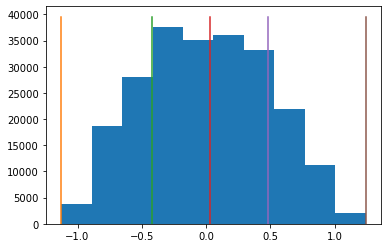

In [44]:
# Discretise the data using kmeans clustering
# Set up discretising function
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

## Strategy info
    # uniform
        # All bins in each feature have identical widths.
    # quantile
        # All bins in each feature have the same number of points.
    # kmeans
        # Values in each bin have the same nearest center of a 1D k-means cluster

# Turn dataframe into array for the discretiser
tide_lagoon_array = np.array(df_Pto_lagoon['Tide'])
tide_lagoon_array = tide_lagoon_array.reshape(len(tide_lagoon_array),1)

# Use the discretiser on the array and gen output
est.fit(tide_lagoon_array)
tide_lagoon_disc_array = est.transform(tide_lagoon_array)

# Turn the resulting discretised array back to a dataframe
df_tide_lagoon_disc = pd.DataFrame(tide_lagoon_disc_array).astype(str)

# Relabel the columns of the new dataframe
df_tide_lagoon_disc.columns = ['Tide']

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.hist(df_Pto_lagoon['Tide'])

for edge in est.bin_edges_:
    ax1.plot([edge,edge],ax1.get_ylim())

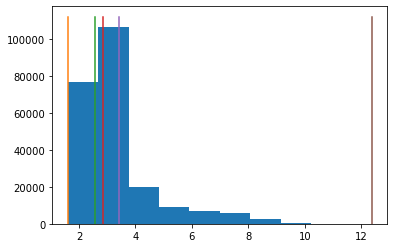

In [47]:
# Discretise the data using kmeans clustering
# Set up discretising function
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

## Strategy info
    # uniform
        # All bins in each feature have identical widths.
    # quantile
        # All bins in each feature have the same number of points.
    # kmeans
        # Values in each bin have the same nearest center of a 1D k-means cluster

# Turn dataframe into array for the discretiser
tide_lagoon_array = np.array(df_Pto_lagoon['Tm_offshore'])
tide_lagoon_array = tide_lagoon_array.reshape(len(tide_lagoon_array),1)

# Use the discretiser on the array and gen output
est.fit(tide_lagoon_array)
tide_lagoon_disc_array = est.transform(tide_lagoon_array)

# Turn the resulting discretised array back to a dataframe
df_tide_lagoon_disc = pd.DataFrame(tide_lagoon_disc_array).astype(str)

# Relabel the columns of the new dataframe
df_tide_lagoon_disc.columns = ['Tm_offshore']

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.hist(df_Pto_lagoon['Tm_offshore'])

for edge in est.bin_edges_:
    ax1.plot([edge,edge],ax1.get_ylim())

In [15]:
np.array(df_Pto_lagoon['Tide']).reshape(227904,1).shape

(227904, 1)

In [13]:
np.array(df_Pto_lagoon[list(df_Pto_lagoon)]).shape

(227904, 10)

In [20]:
df_tide_lagoon_disc

,Tide
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
227899,0.0
227900,0.0
227901,1.0
227902,1.0


array([array([-1.1266828 , -0.42471461,  0.02698937,  0.47905084,  1.24178494])],
      dtype=object)

In [34]:
dir(plt.gca)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']